## Python statistics essential training - 05_02_fitmodel

Standard imports

In [6]:
import math

In [7]:
import numpy as np
import pandas as pd

In [8]:
import matplotlib
import matplotlib.pyplot as pp

In [9]:
%matplotlib inline

In [10]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

Loading gapminder data for year 1985 (Live Aid!) and setting up plot as in chapter 3

In [11]:
gapminder = pd.read_csv('gapminder.csv')

In [12]:
gdata = gapminder.query('year == 1985')

In [13]:
size = 1e-6 * gdata.population

colors = gdata.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving','babies_per_woman',
                       c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)

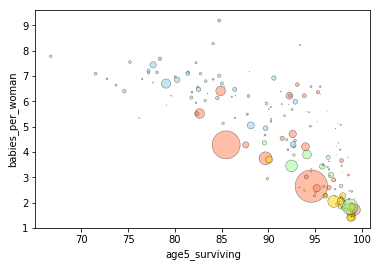

In [14]:
plotdata() # Colorts denote regions, Size denote population.

#### Python statsmodels is used to study the dataset. We will default to OLS method (Ordinary Least Squares)

# Statsmodel use tilda formula notation. (simillar to R notation)

# Formula go like:
 # Response_variable ~ model_terms

In [25]:
model = smf.ols(formula='babies_per_woman ~ 1', data=gdata) # Here 1 represents a constand. ols methods optimizes to a single value for all observations in training set.

In [26]:
grandmean = model.fit()

In [27]:
grandmean

In [28]:
def plotfit(fit):
    plotdata()
    pp.scatter(gdata.age5_surviving, fit.predict(gdata), c=colors, s=10, edgecolor='k', marker='D')

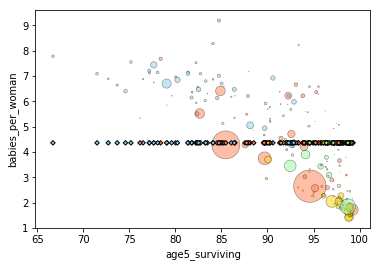

In [29]:
plotfit(grandmean)

In [30]:
# The result od the grandmean model is equivalent to returning mean of response variables.
# We can verify by checking the fitparameters which are present in params of the model.

In [32]:
grandmean.params # mean of the data.

Intercept    4.360714
dtype: float64

### If we added a model term to the formula we considerd taking mean of the groups
### We added a qualitative variable -> In response the model fit groupmeans

In [36]:
model = smf.ols(formula='babies_per_woman ~ 1 + region', data=gdata).fit()

In [37]:
model.params

Intercept            6.321321
region[T.America]   -2.663139
region[T.Asia]      -1.545744
region[T.Europe]    -4.285639
dtype: float64

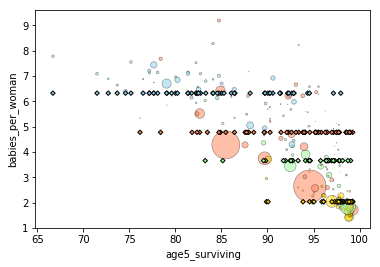

In [39]:
plotfit(model) # Grouped means with respect to regions.

In [40]:
### Now We are adding a quantative variable -> In response the model fits slopes in the groups.

In [42]:
surving_model = smf.ols(formula = 'babies_per_woman ~ 1 + region + age5_surviving', data=gdata).fit()

In [43]:
surving_model.params

Intercept            18.265792
region[T.America]    -1.179908
region[T.Asia]       -0.401052
region[T.Europe]     -2.393610
age5_surviving       -0.141886
dtype: float64

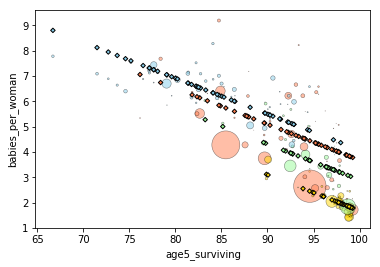

In [45]:
plotfit(surving_model)

In [46]:
# For every additional percentage of point the number of babies per woman decrease by 0.14

In [47]:
# If we wish to have a different slope for every region we can throw an interactive term.

### Interraction terms are writen with a ':'

In [55]:
surviving_byregion = smf.ols(formula = 'babies_per_woman ~ -1 + region + age5_surviving:region', data=gdata).fit()

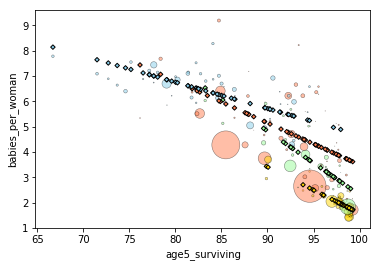

In [56]:
plotfit(surviving_byregion)

In [57]:
surviving_byregion.params

region[Africa]                    15.080914
region[America]                   27.506243
region[Asia]                      20.032483
region[Europe]                    19.884446
age5_surviving:region[Africa]     -0.104053
age5_surviving:region[America]    -0.251994
age5_surviving:region[Asia]       -0.165384
age5_surviving:region[Europe]     -0.183029
dtype: float64

In [58]:
# india and china cause of hugh difference in population are outliers to account for this we add another term.

In [59]:
surviving_byregion_population = smf.ols(formula= 'babies_per_woman ~ -1 + region + age5_surviving:region + population', data=gdata).fit()

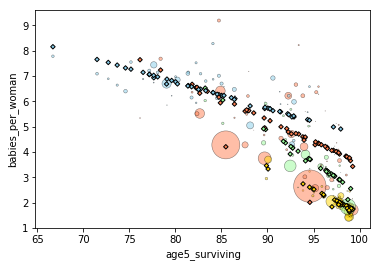

In [60]:
plotfit(surviving_byregion_population)